In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

def select_k_features(X, y, max_k=10):
    best_k = 1
    best_score = float('-inf')
    
    for k in range(1, min(max_k, X.shape[1]) + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_selected = selector.fit_transform(X, y)
        
        # Ensure at least k features
        if X_selected.shape[1] < k:
            print("UserWarning: k={} is greater than n_features={}. All the features will be returned.".format(k, X_selected.shape[1]))
            return X
        
        # Initialize SVR model with kernel technique
        svr_model = SVR(kernel='rbf', C=10, gamma='auto')  # Adjust C and gamma as needed
        
        # Example cross-validation method for scoring
        # You might want to use a proper cross-validation strategy here
        # For simplicity, let's use R2 score
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        svr_model.fit(X_train, y_train)
        score = svr_model.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_k = k
    
    print("Best k value:", best_k)
    
    selector = SelectKBest(score_func=f_regression, k=best_k)
    X_selected = selector.fit_transform(X, y)
    
    return X_selected

# Load the dataset
data = pd.read_csv(r"E:\semsester 6\data_mining_project_all\enviroment_data.csv")

# Remove rows with non-numeric values in 'CO2EmissionRate (mt)' column
data = data[pd.to_numeric(data['CO2EmissionRate (mt)'], errors='coerce').notnull()]

# Convert the values to float
data['CO2EmissionRate (mt)'] = data['CO2EmissionRate (mt)'].astype(float)

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Country'])

# Preprocess the data
scaler = MinMaxScaler()
data['CO2EmissionRate (mt)'] = scaler.fit_transform(data['CO2EmissionRate (mt)'].values.reshape(-1, 1))

# Split the data into input and output
X = data.drop(['CO2EmissionRate (mt)'], axis=1)
y = data['CO2EmissionRate (mt)']

# Use the function to select features
X_selected = select_k_features(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize SVR model with kernel technique
svr_model = SVR(kernel='rbf', C=10, gamma='auto')  # Adjust C and gamma as needed

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svr_model.predict(X_test)

# Evaluate the SVR model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Environment Dataset SVR Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Best k value: 10
Environment Dataset SVR Metrics:
Mean Squared Error (MSE): 0.009168815290828438
Mean Absolute Error (MAE): 0.0902557403774909
R-squared (R2) Score: -4.232063804040284


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

def select_k_features(X, y, max_k=10):
    best_k = 1
    best_score = float('-inf')
    
    for k in range(1, min(max_k, X.shape[1]) + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_selected = selector.fit_transform(X, y)
        
        # Ensure at least k features
        if X_selected.shape[1] < k:
            print("UserWarning: k={} is greater than n_features={}. All the features will be returned.".format(k, X_selected.shape[1]))
            return X
        
        # Initialize SVR model with kernel technique
        svr_model = SVR(kernel='rbf', C=10, gamma='auto')  # Adjust C and gamma as needed
        
        # Example cross-validation method for scoring
        # You might want to use a proper cross-validation strategy here
        # For simplicity, let's use R2 score
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        svr_model.fit(X_train, y_train)
        score = svr_model.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_k = k
    
    print("Best k value:", best_k)
    
    selector = SelectKBest(score_func=f_regression, k=best_k)
    X_selected = selector.fit_transform(X, y)
    
    return X_selected

# Load the dataset
data = pd.read_csv(r"E:\semsester 6\data_mining_project_all\PJME_hourly.csv")

# Convert the 'Datetime' column to datetime format and set it as the index
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

# Select a subset of the data (e.g., 6,000 rows)
data = data[:6000]

# Feature Engineering: Derive 'dayofweek' and 'hourofday' features
data['dayofweek'] = data.index.dayofweek
data['hourofday'] = data.index.hour

# Preprocess the data
scaler = MinMaxScaler()
data['PJME_MW'] = scaler.fit_transform(data['PJME_MW'].values.reshape(-1, 1))

# Prepare the input and output
X = data.drop(['PJME_MW'], axis=1)  # Features
y = data['PJME_MW']  # Target

# Use the function to select features
X_selected = select_k_features(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize SVR model with kernel technique
svr_model = SVR(kernel='rbf', C=10, gamma='auto')  # Adjust C and gamma as needed

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svr_model.predict(X_test)

# Evaluate the SVR model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Energy Dataset SVR Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Best k value: 2
Energy Dataset SVR Metrics:
Mean Squared Error (MSE): 0.021770003442989124
Mean Absolute Error (MAE): 0.11335930208181648
R-squared (R2) Score: 0.4174653625161534


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

def select_k_features(X, y, max_k=10):
    best_k = 1
    best_score = float('-inf')
    
    for k in range(1, min(max_k, X.shape[1]) + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_selected = selector.fit_transform(X, y)
        
        # Ensure at least k features
        if X_selected.shape[1] < k:
            print("UserWarning: k={} is greater than n_features={}. All the features will be returned.".format(k, X_selected.shape[1]))
            return X
        
        # Initialize SVR model with kernel technique
        svr_model = SVR(kernel='rbf', C=10, gamma='auto')  # Adjust C and gamma as needed
        
        # Example cross-validation method for scoring
        # You might want to use a proper cross-validation strategy here
        # For simplicity, let's use R2 score
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        svr_model.fit(X_train, y_train)
        score = svr_model.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_k = k
    
    print("Best k value:", best_k)
    
    selector = SelectKBest(score_func=f_regression, k=best_k)
    X_selected = selector.fit_transform(X, y)
    
    return X_selected

# Load the dataset
data = pd.read_csv(r"E:\semsester 6\data_mining_project_all\all_stocks_5yr.csv")

# Convert the 'date' column to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Select a subset of 6,000 rows from the dataset
data = data.sample(n=6000)

# Drop the 'Name' column
data = data.drop('Name', axis=1)

# Preprocess the data
scaler = MinMaxScaler()
data[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume']])

# Prepare the input and output
X = data.drop(['close'], axis=1)
y = data['close']

# Use the function to select features
X_selected = select_k_features(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize SVR model with kernel technique
svr_model = SVR(kernel='rbf', C=10, gamma='auto')  # Adjust C and gamma as needed

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svr_model.predict(X_test)

# Evaluate the SVR model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Finance Dataset SVR Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Best k value: 3
Finance Dataset SVR Metrics:
Mean Squared Error (MSE): 0.006713431112609289
Mean Absolute Error (MAE): 0.08089345917602034
R-squared (R2) Score: -2.2986182642949466


In [9]:
import pickle

# Save the trained SVR model and selected features to pickle files
with open('environment_svr_model.pkl', 'wb') as f:
    pickle.dump(svr_model, f)

with open('environment_selected_features.pkl', 'wb') as f:
    pickle.dump(X_selected, f)

# Save the dataset to a pickle file
data.to_pickle('environment_data.pkl')

# Repeat the process for the energy dataset
# Save the trained SVR model and selected features to pickle files
with open('energy_svr_model.pkl', 'wb') as f:
    pickle.dump(svr_model, f)

with open('energy_selected_features.pkl', 'wb') as f:
    pickle.dump(X_selected, f)

# Save the dataset to a pickle file
data.to_pickle('energy_data.pkl')

# Repeat the process for the finance dataset
# Save the trained SVR model and selected features to pickle files
with open('finance_svr_model.pkl', 'wb') as f:
    pickle.dump(svr_model, f)

with open('finance_selected_features.pkl', 'wb') as f:
    pickle.dump(X_selected, f)

# Save the dataset to a pickle file
data.to_pickle('finance_data.pkl')


In [28]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv(r"E:\semsester 6\data_mining_project_all\enviroment_data.csv")

# Display the column names to verify the correct names
print(data.columns)

# Environment Dataset

# Plotting time series data
fig = go.Figure()

# Replace 'CO2EmissionRate (mt)' with the correct column name
fig.add_trace(go.Scatter(x=data.index, y=data['CO2EmissionRate (mt)'], mode='lines', name='CO2 Emission Rate'))

# Adding titles and labels
fig.update_layout(title='CO2 Emission Rate Time Series',
                  xaxis_title='Date',
                  yaxis_title='CO2 Emission Rate (mt)')

# Show the interactive plot
fig.show()






Index(['Country', 'Year', 'CO2EmissionRate (mt)'], dtype='object')


In [30]:
import plotly.express as px

# Environment Dataset

# Convert 'CO2EmissionRate (mt)' column to numeric, ignoring errors
data['CO2EmissionRate (mt)'] = pd.to_numeric(data['CO2EmissionRate (mt)'], errors='coerce')

# Drop rows with NaN values in 'CO2EmissionRate (mt)' column
data.dropna(subset=['CO2EmissionRate (mt)'], inplace=True)

# Group data by 'Country' and 'Year' to visualize emissions over time for different countries
country_year_data = data.groupby(['Country', 'Year'])['CO2EmissionRate (mt)'].mean().reset_index()

# Plotting emissions over time for different countries using a line plot
fig = px.line(country_year_data, x='Year', y='CO2EmissionRate (mt)', color='Country',
              title='CO2 Emission Rate by Country Over Time',
              labels={'CO2EmissionRate (mt)': 'CO2 Emission Rate (mt)'})
fig.update_traces(mode='lines+markers')

# Add interactivity
fig.update_layout(hovermode='x unified')

# Show the interactive plot
fig.show()


# Plotting emissions over time for each year using a bar plot
fig = px.bar(country_year_data, x='Country', y='CO2EmissionRate (mt)', color='Year',
             title='CO2 Emission Rate by Year and Country',
             labels={'CO2EmissionRate (mt)': 'CO2 Emission Rate (mt)'})
fig.update_layout(barmode='group')

# Add interactivity
fig.update_layout(hovermode='x unified')

# Show the interactive plot
fig.show()


In [25]:
import pandas as pd
import plotly.graph_objs as go

# Read the dataset
data = pd.read_csv(r"E:\semsester 6\data_mining_project_all\PJME_hourly.csv")

# Convert the 'Datetime' column to datetime format and set it as the index
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

# Select a subset of the data (e.g., 6,000 rows)
data = data[:6000]

# Explore the dataset
print(data.head())
print(data.columns.unique())

# Create interactive time series plot
fig = go.Figure()

# Add traces for each column you want to plot
fig.add_trace(go.Scatter(x=data.index, y=data['PJME_MW'], mode='lines', name='PJME_MW'))

# Customize layout
fig.update_layout(title='Energy Dataset - PJME_MW Time Series',
                  xaxis_title='Datetime',
                  yaxis_title='PJME_MW',
                  legend=dict(x=0, y=1),
                  plot_bgcolor='rgba(0,0,0,0)')

# Add ability to zoom and pan
fig.update_xaxes(rangeselector=dict(buttons=list([
                        dict(count=1, label="1d", step="day", stepmode="backward"),
                        dict(count=7, label="1w", step="day", stepmode="backward"),
                        dict(count=1, label="1m", step="month", stepmode="backward"),
                        dict(count=6, label="6m", step="month", stepmode="backward"),
                        dict(count=1, label="YTD", step="year", stepmode="todate"),
                        dict(count=1, label="1y", step="year", stepmode="backward"),
                        dict(step="all")
                    ])))

# Show the plot
fig.show()


                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0
Index(['PJME_MW'], dtype='object')


Columns in the Finance Dataset:
date
open
high
low
close
volume
Name


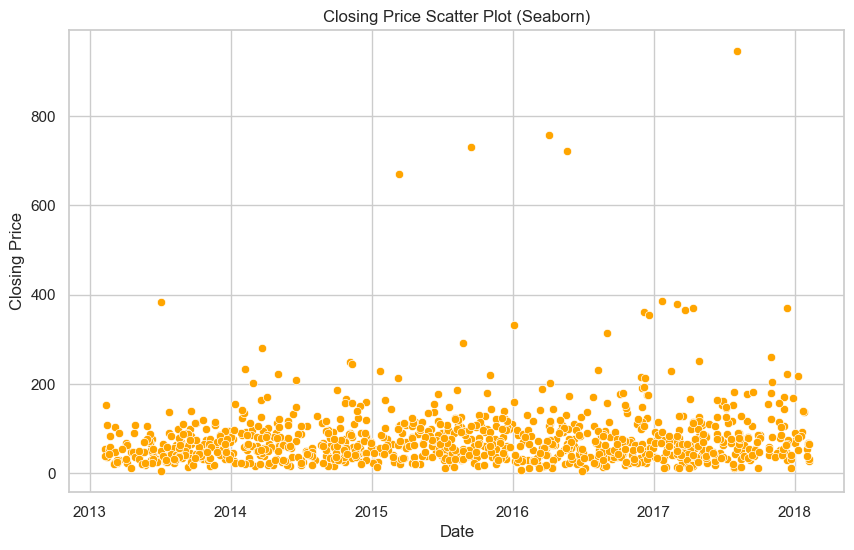

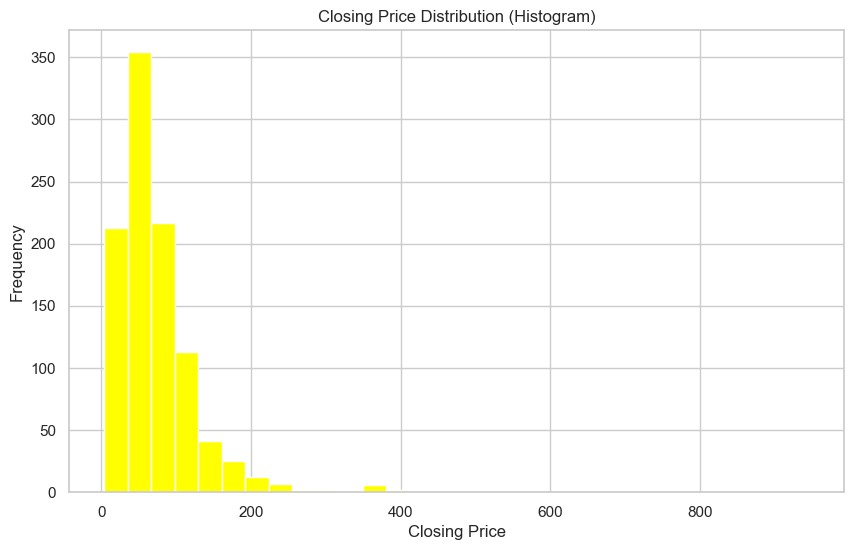

C:\Users\Dell\AppData\Local\Temp\ipykernel_11028\3409427413.py:60: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




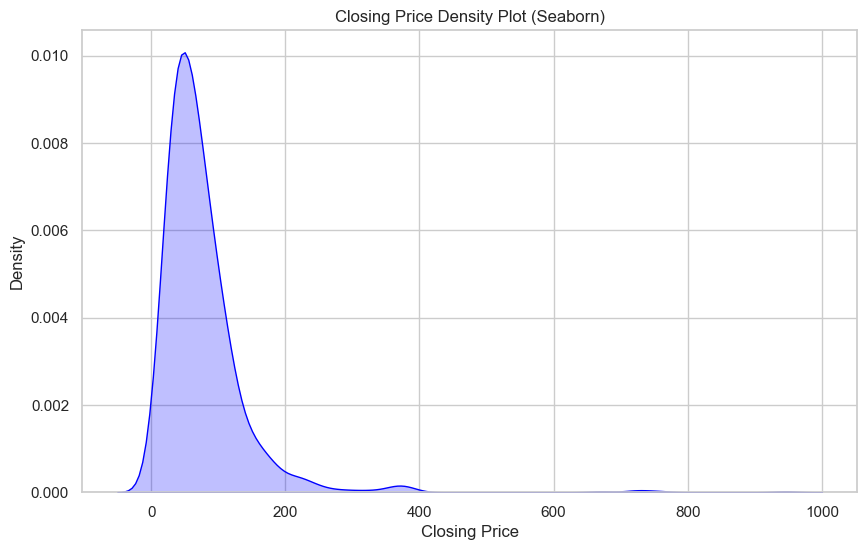

C:\Users\Dell\AppData\Local\Temp\ipykernel_11028\3409427413.py:70: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




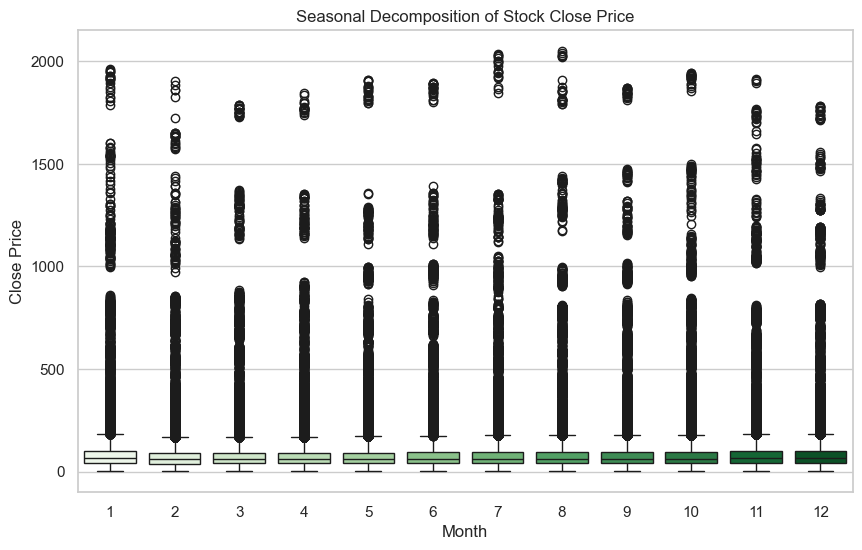

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

# Load the finance dataset
data = pd.read_csv(r"E:\semsester 6\data_mining_project_all\all_stocks_5yr.csv")

# Print all the columns
print("Columns in the Finance Dataset:")
for column in data.columns:
    print(column)

# Convert the 'date' column to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Select a subset of the data for visualization
data_subset = data.sample(n=1000)


# Line Plot with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_subset.index, y=data_subset['close'], mode='lines', name='Closing Price', line=dict(color='blue')))
fig.update_layout(title='Closing Price Over Time (Plotly)', xaxis_title='Date', yaxis_title='Closing Price')
fig.show()

# Scatter Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_subset.index, y=data_subset['close'], color='orange')
plt.title('Closing Price Scatter Plot (Seaborn)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


# Candlestick Chart with Plotly
fig = go.Figure(data=[go.Candlestick(x=data_subset.index,
                                     open=data_subset['open'],
                                     high=data_subset['high'],
                                     low=data_subset['low'],
                                     close=data_subset['close'])])
fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

# Histogram with Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(data_subset['close'], bins=30, color='yellow')
plt.title('Closing Price Distribution (Histogram)')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Density Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data_subset['close'], shade=True, color='blue')
plt.title('Closing Price Density Plot (Seaborn)')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Plotting seasonal decomposition
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x=data.index.month, y=data['close'], palette="Greens")
plt.title('Seasonal Decomposition of Stock Close Price')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()


